In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Списки

Вам дан список. Поменяйте порядок следования каждого чётного элемента во второй половине списка. 

In [ ]:
a = [1, 3, 5, 6, 7, 4, 12, 4, 5, 2, 23, 3, 24]

half = len(a) // 2
second_half = a[half:]
evens = [x for x in second_half if x % 2 == 0]

j = 0

for i in range(half, len(a)):
    if a[i] % 2 == 0:
        a[i] = evens[len(evens) - j - 1]
        j += 1

print(a)

[1, 3, 5, 6, 7, 4, 24, 2, 5, 4, 23, 3, 12]


In [ ]:
a = [1, 3, 5, 6, 7, 4, 12, 4, 5, 2, 23, 3, 24]

half = len(a) // 2
second_half = a[half:]




Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётным со второго по пятый с конца. 

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

a_begin = a[1: 5: 2]
a_end = a[-2: -6: -2]

a[1: 5: 2] = a_end
a[-2: -6: -2] = a_begin

print(a)


[1, 9, 3, 7, 5, 6, 4, 8, 2, 10]


## Генераторы

Вам дан список. Создайте новый список, в котором элементы будут уменьшены

In [52]:
a = [5, 6, 7, 8]
b = [x - 1 for x in a]

print(b)


[4, 5, 6, 7]


Вам дан список. Создайте новый список, в котором будут чётные элементы возведены в квадрат, а нечётные в куб.

In [53]:
a = [1, 2, 3, 4, 5]
b = [x ** 2 if x % 2 == 0 else x ** 3 for x in a]

print(b)


[1, 4, 27, 16, 125]


## Встроенные функции

Вам дана строка. Выведите ascii-код минимального элемента в строке. 

In [54]:
s = "python"
print(ord(min(s)))

104


Вам дана строка. Выведите строку, символы которой будут смещены по ascii на порядковый номер элемента.

In [55]:
s = "abc"
res = ''.join(chr(ord(c) + i) for i, c in enumerate(s))
print(res)

ace


## NumPy

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [56]:
A = np.arange(16 * 16).reshape(16, 16)
B = A.reshape(4, 4, 4, 4).sum(axis=(2, 3))

print(B)

[[ 120  376  632  888]
 [1144 1400 1656 1912]
 [2168 2424 2680 2936]
 [3192 3448 3704 3960]]


Даны линии и точка

Расчитайте расстояние от точки до каждой прямой, найдите ближащую.

In [ ]:
lines = [(1, -1, 0), (0, 1, -3), (2, 1, -4)]  # ax + by + c = 0
x0, y0 = 1, 2

distances = []

for a, b, c in lines:
    denom = np.sqrt(a ** 2 + b ** 2)

    if denom == 0:
        distances.append(np.inf)

    else:
        distances.append(abs(a*x0 + b*y0 + c) / denom)

distances = np.array(distances)
idx_min = np.argmin(distances)

print(f"Ближайшая прямая: {lines[idx_min]}, расстояние: {distances[idx_min]}")

Ближайшая прямая: (2, 1, -4), расстояние: 0.0


## Pandas

https://www.kaggle.com/datasets/blurredmachine/hackerearth-employee-attrition?select=Train.csv

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте распределения переменной `Attrition_rate`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `Relationship_Status` *(т.е. отдельно какие показатели у класса Marries, какие у класса Single)*.
- Постройте гистаграмму для переменной `Unit` и найдите по ней самую популярную профессию.
- Найдите сколько замужних/женатых людей у самой популярной профессии имеют `Attrition_rate` выше среднего.

In [81]:
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 200)

In [82]:
data_path = "/Users/dmitryo325/Desktop/yandex/Train.csv"
df = pd.read_csv(data_path)

print(df.shape)

(7000, 24)


In [83]:
print(df.dtypes)  # типы данных

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [100]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [84]:
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(missing_counts)

VAR4                 656
VAR2                 577
Age                  412
Time_of_service      144
Work_Life_balance     11
Pay_Scale              9
dtype: int64


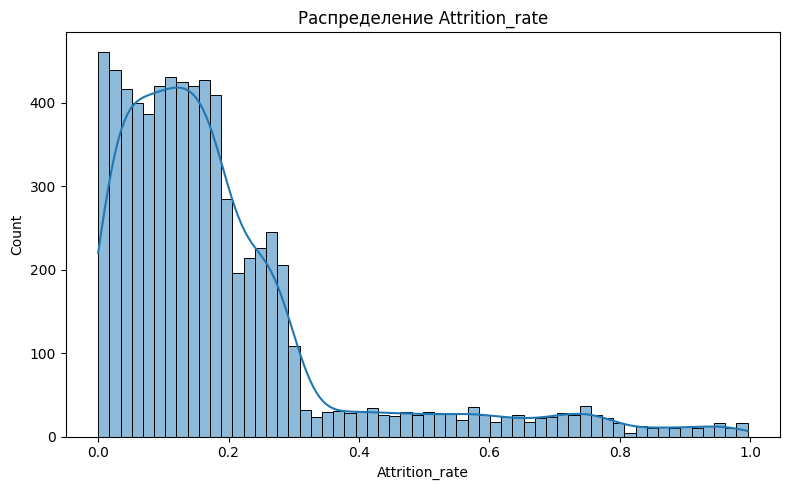

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Attrition_rate'].dropna(), kde=True)
plt.title("Распределение Attrition_rate")
plt.xlabel("Attrition_rate")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

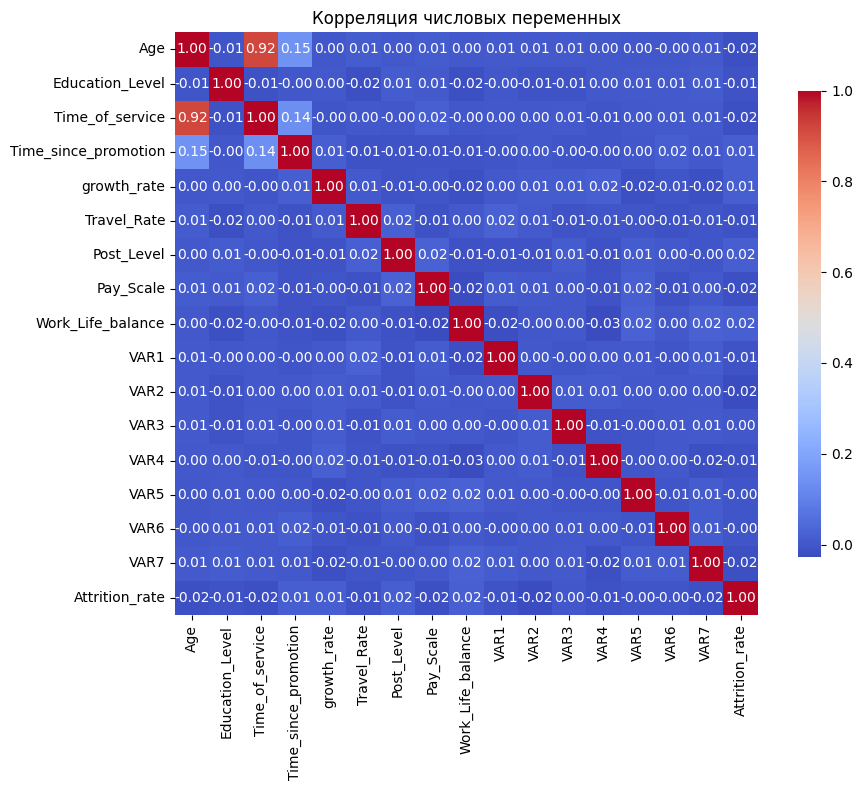

In [ ]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink':.8})
plt.title("Корреляция числовых переменных")
plt.tight_layout()
plt.show()

In [ ]:
0 1 2 3 4 5 6 7
0 1 2 3 4 5 6 7 

0 1 4 9 16 25 36 49

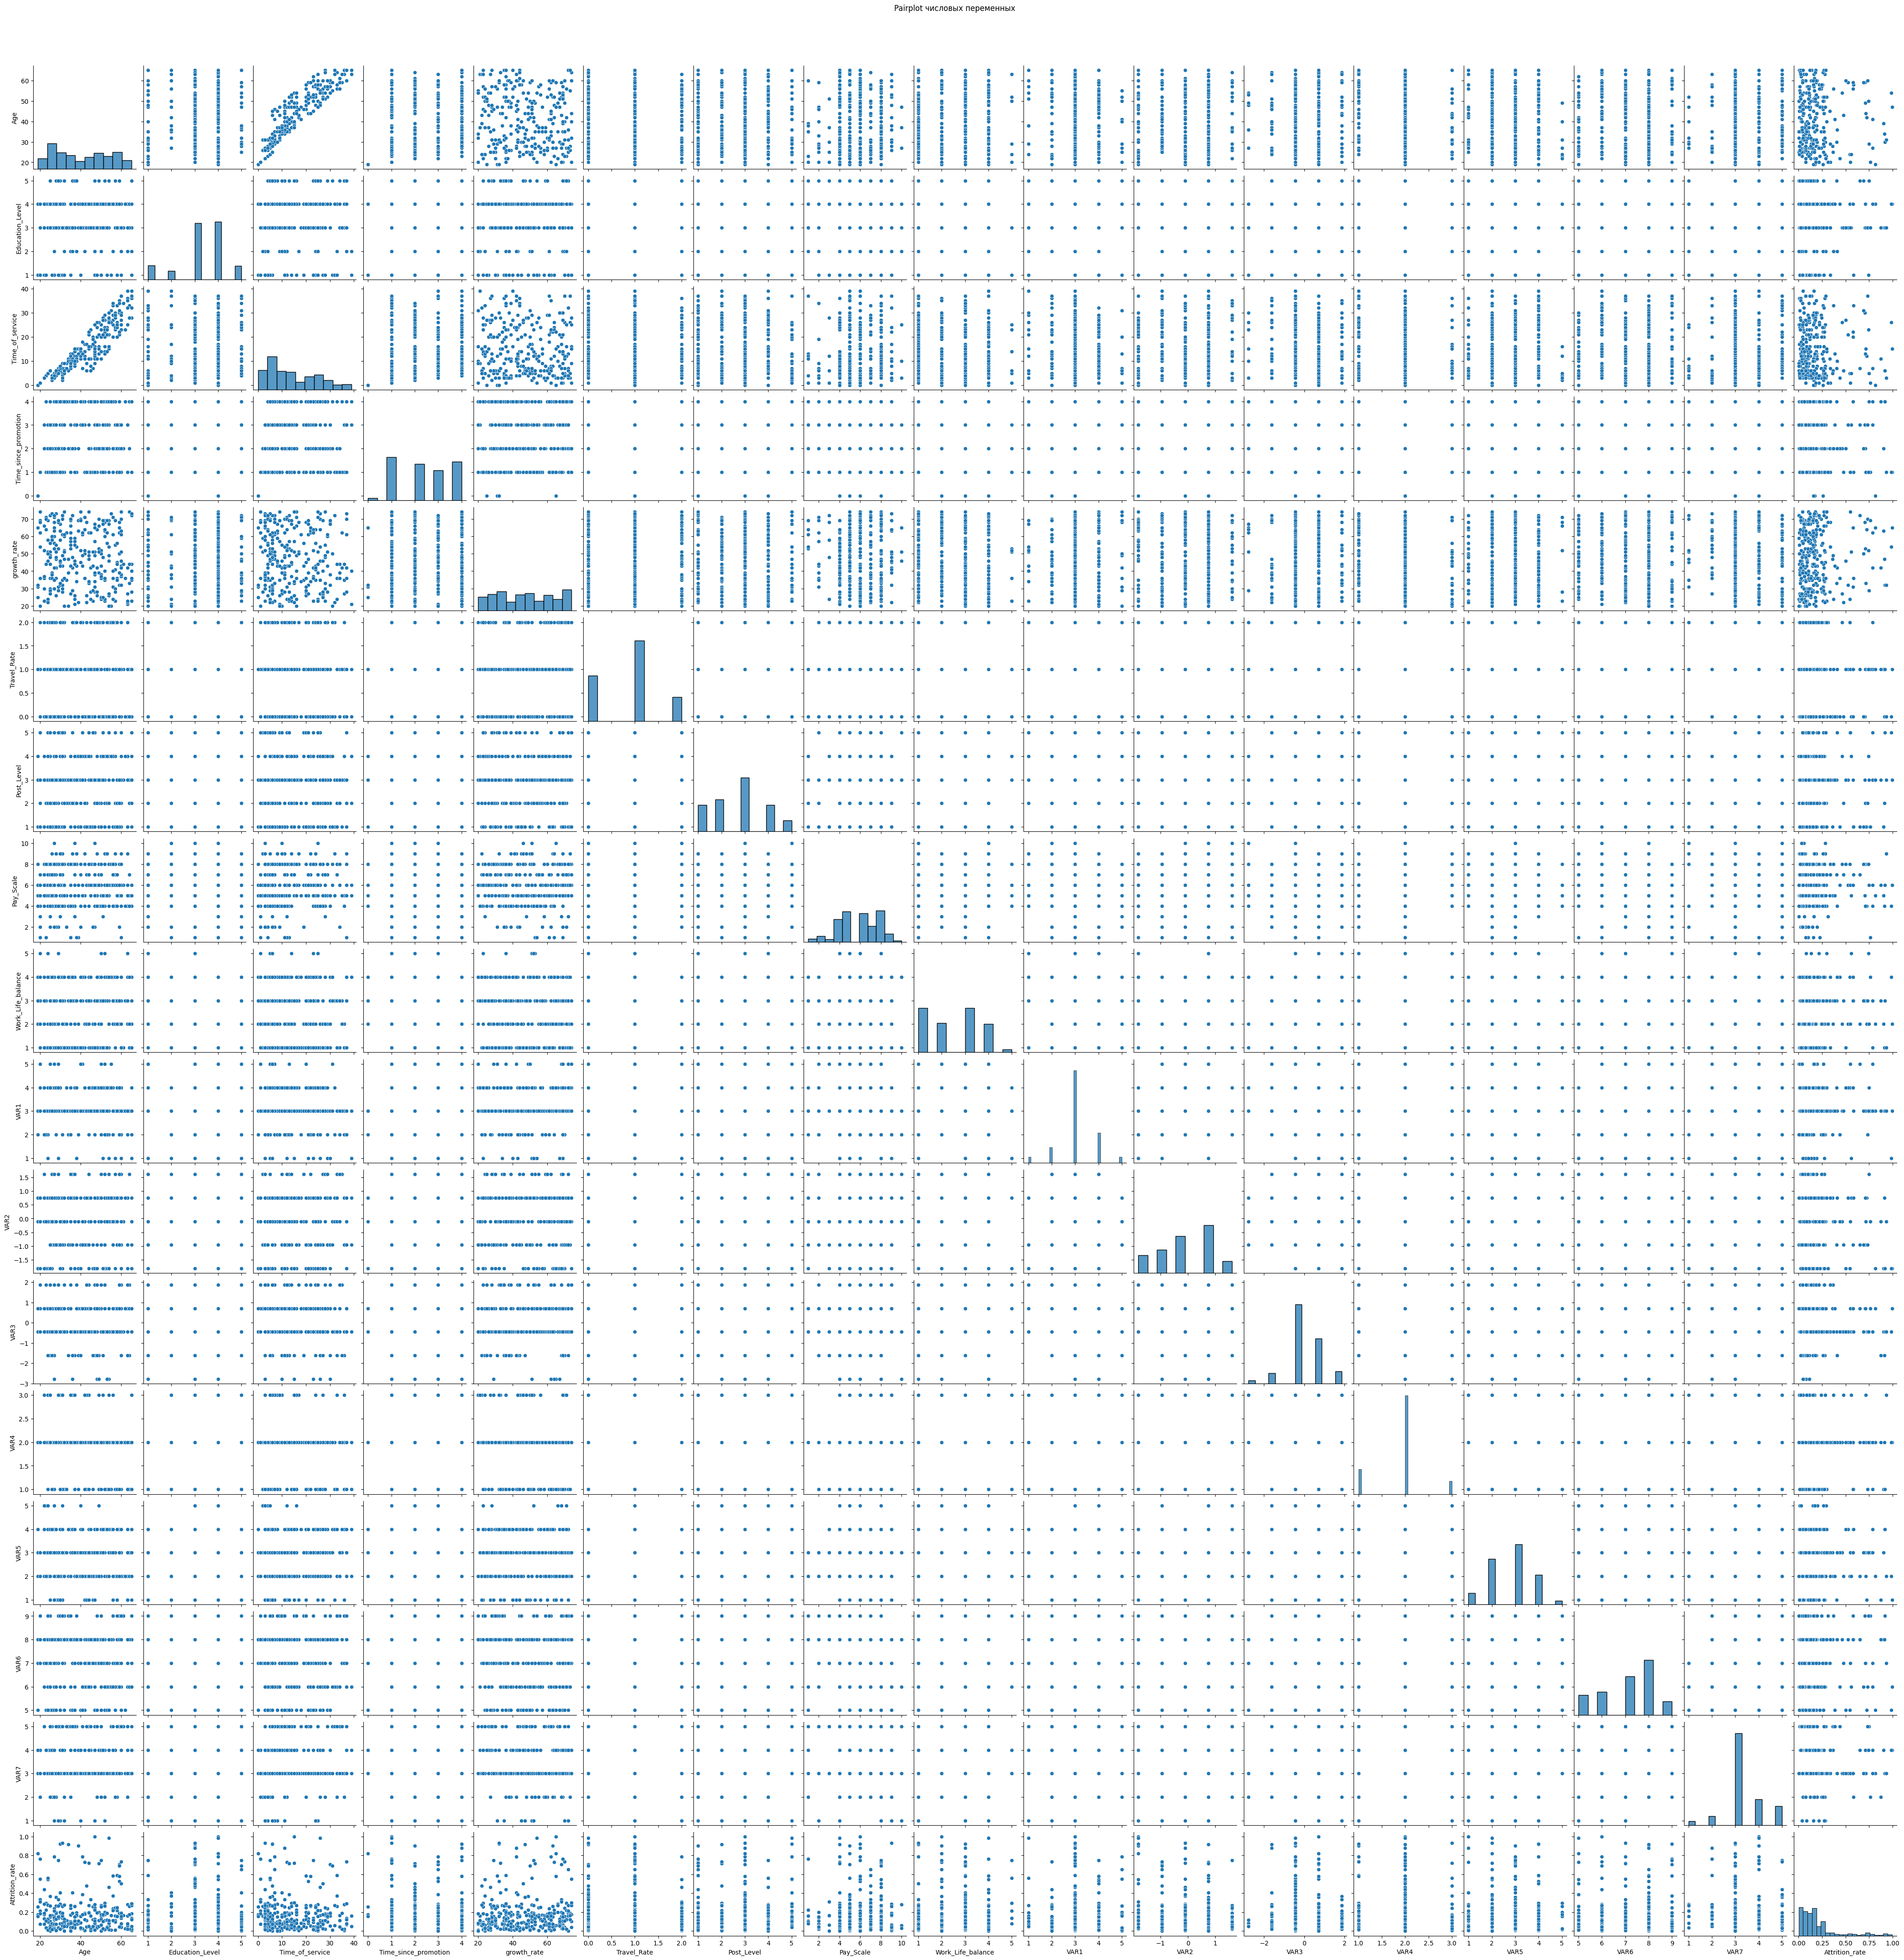

In [87]:
num_df = df.select_dtypes(include=np.number)

sns.pairplot(num_df.sample(n=min(300, len(df)), random_state=42))
plt.suptitle("Pairplot числовых переменных", y=1.02)
plt.show()


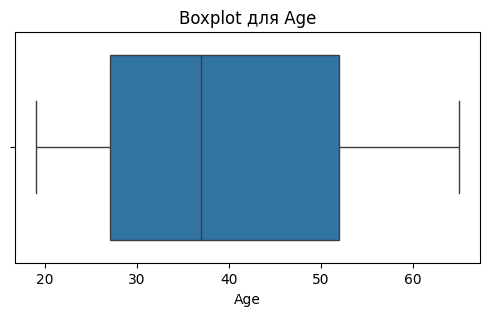

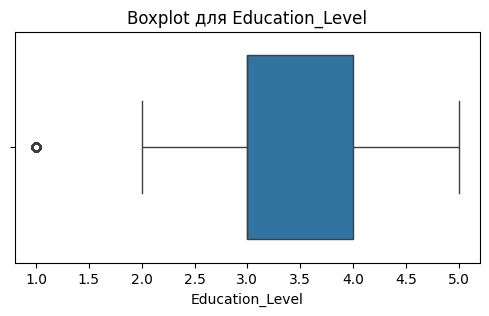

Выбросы в 'Education_Level': 695 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
22,EID_3722,M,65.0,1,Married,Franklin,IT,Analytical,33.0,2,30,0,3,7.0,type2,2.0,3,NaN,0.7075,1.0,3,6,3,0.1708
32,EID_5824,F,54.0,1,Single,Springfield,IT,Behavioral,30.0,3,22,0,1,5.0,type3,2.0,3,-1.8176,-0.4537,2.0,4,7,3,0.0447
48,EID_2413,F,57.0,1,Married,Springfield,IT,Directive,35.0,3,37,1,3,2.0,type3,1.0,4,0.7516,0.7075,2.0,2,6,3,0.1593
58,EID_5986,F,54.0,1,Married,Franklin,IT,Conceptual,23.0,2,29,2,1,6.0,type3,1.0,3,NaN,-0.4537,NaN,4,6,4,0.1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,EID_7509,M,42.0,1,Married,Springfield,Purchasing,Directive,15.0,4,58,1,2,6.0,type3,3.0,3,-0.9612,0.7075,1.0,4,7,3,0.4429
6987,EID_21257,F,45.0,1,Single,Lebanon,Operarions,Analytical,15.0,1,51,2,3,3.0,type3,2.0,5,-0.9612,1.8688,2.0,3,6,3,0.1218
6989,EID_20243,F,28.0,1,Married,Lebanon,R&D,Conceptual,4.0,4,26,0,1,8.0,type2,3.0,3,-0.9612,-2.7762,3.0,3,5,3,0.2541
6992,EID_19922,F,26.0,1,Married,Franklin,Accounting and Finance,Analytical,4.0,2,52,1,3,3.0,type2,1.0,1,-0.1048,0.7075,2.0,3,8,3,0.2238


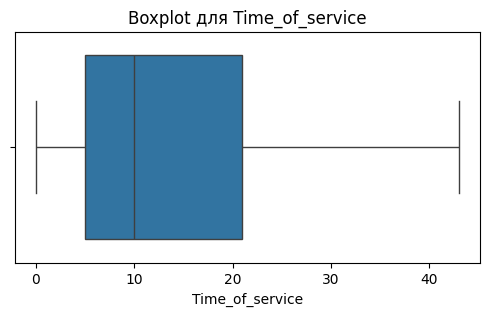

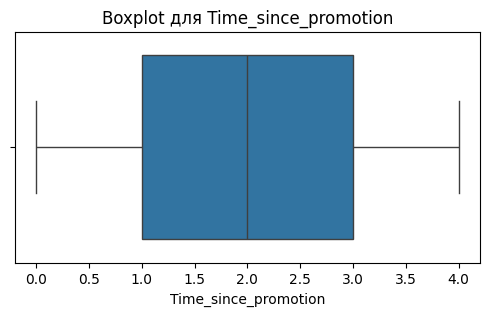

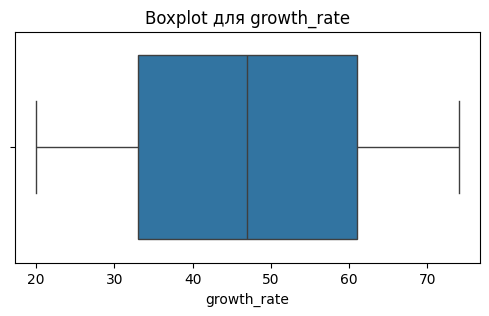

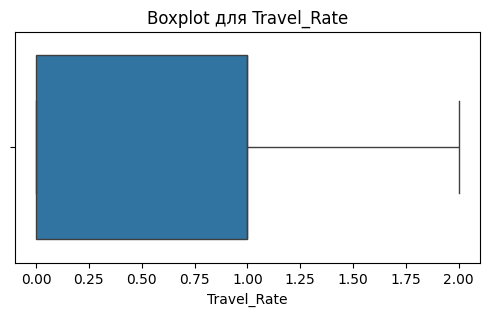

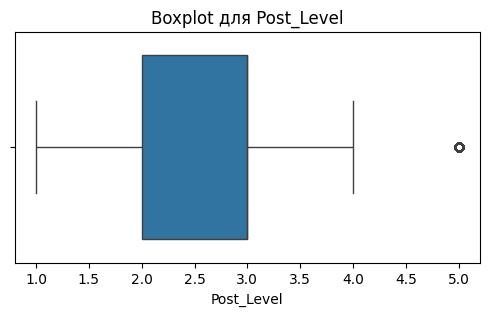

Выбросы в 'Post_Level': 698 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
33,EID_2025,F,55.0,3,Married,Franklin,IT,Behavioral,33.0,4,66,0,5,7.0,type3,4.0,3,-0.1048,-0.4537,2.0,2,6,3,0.2307
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
41,EID_10767,M,43.0,4,Married,Washington,Operarions,Behavioral,12.0,4,50,2,5,5.0,type2,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.1983
45,EID_1028,F,39.0,3,Single,Franklin,Production,Directive,14.0,4,67,1,5,5.0,type4,1.0,3,1.6081,0.7075,NaN,3,6,3,0.0882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,EID_18566,F,NaN,1,Single,Washington,R&D,Conceptual,4.0,2,45,0,5,8.0,type3,4.0,3,0.7516,-1.6150,3.0,4,6,3,0.0986
6971,EID_21048,F,30.0,4,Single,Lebanon,Logistics,Behavioral,6.0,2,66,2,5,9.0,type2,3.0,2,-0.9612,-0.4537,2.0,4,6,2,0.0133
6977,EID_24726,F,31.0,5,Married,Springfield,Operarions,Directive,4.0,4,70,2,5,7.0,type3,2.0,2,0.7516,0.7075,2.0,3,5,4,0.1458
6984,EID_22574,F,47.0,3,Married,Lebanon,Purchasing,Conceptual,24.0,3,57,0,5,8.0,type2,2.0,4,0.7516,0.7075,2.0,4,6,3,0.0765


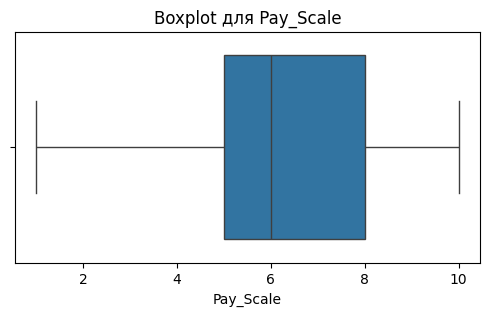

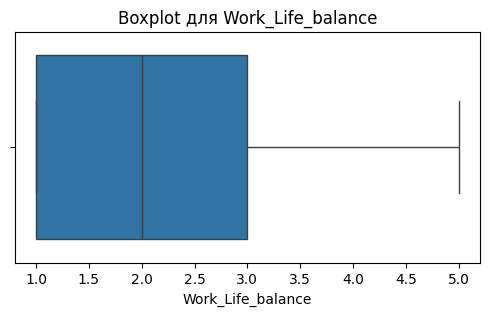

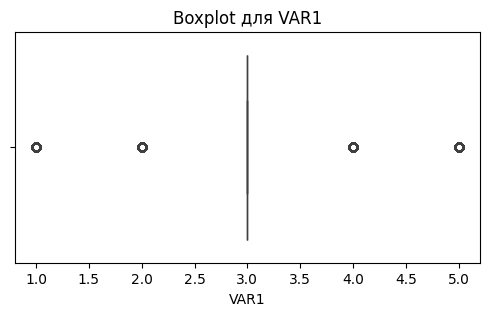

Выбросы в 'VAR1': 2807 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,0,1,9.0,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
13,EID_17644,F,23.0,4,Single,Washington,Logistics,Conceptual,4.0,2,70,1,3,8.0,type2,3.0,4,-0.1048,-1.6150,2.0,4,8,3,0.1696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,EID_11159,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,34,0,1,8.0,type2,4.0,4,-0.1048,1.8688,2.0,4,7,2,0.0480
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847


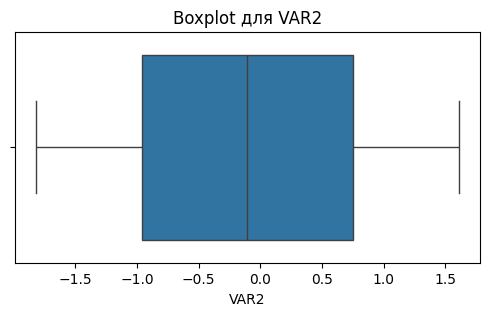

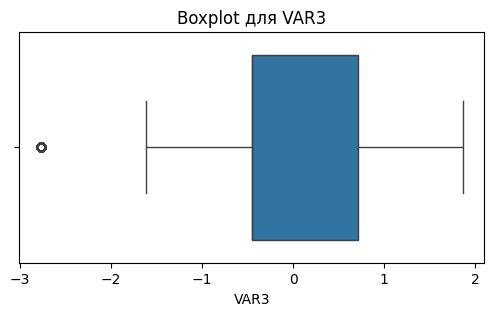

Выбросы в 'VAR3': 198 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
55,EID_24847,F,37.0,3,Married,Springfield,Sales,Behavioral,10.0,2,66,1,4,5.0,type3,2.0,3,-0.1048,-2.7762,1.0,2,5,4,0.1544
73,EID_10356,F,36.0,3,Married,Washington,Logistics,Directive,9.0,4,61,1,5,4.0,type3,4.0,3,-0.1048,-2.7762,2.0,3,8,4,0.1746
130,EID_25656,M,28.0,3,Married,Lebanon,Sales,Directive,4.0,1,48,0,3,1.0,type0,1.0,3,-0.9612,-2.7762,2.0,2,8,2,0.7559
150,EID_11537,M,32.0,2,Single,Lebanon,Operarions,Analytical,10.0,2,24,1,5,7.0,type2,3.0,3,0.7516,-2.7762,2.0,4,6,3,0.0830
217,EID_4136,F,49.0,4,Single,Washington,Logistics,Behavioral,15.0,2,51,0,3,6.0,type3,2.0,4,-0.1048,-2.7762,3.0,2,7,3,0.0478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6864,EID_4822,F,63.0,3,Married,Franklin,Sales,Conceptual,40.0,4,42,2,5,4.0,type2,1.0,3,-1.8176,-2.7762,2.0,3,8,3,0.1539
6927,EID_8338,M,49.0,3,Married,Washington,Operarions,Directive,13.0,3,23,1,4,6.0,type2,4.0,3,-0.9612,-2.7762,1.0,4,8,3,0.6958
6944,EID_21167,M,25.0,2,Married,Springfield,Sales,Behavioral,6.0,1,27,0,3,7.0,type0,1.0,5,0.7516,-2.7762,2.0,3,6,3,0.2330
6989,EID_20243,F,28.0,1,Married,Lebanon,R&D,Conceptual,4.0,4,26,0,1,8.0,type2,3.0,3,-0.9612,-2.7762,3.0,3,5,3,0.2541


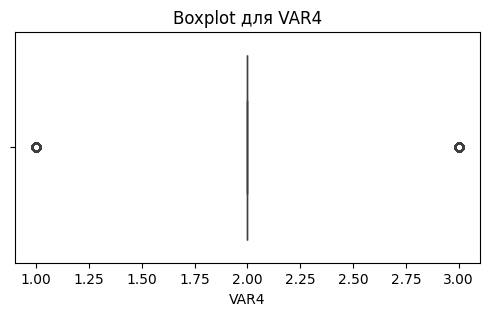

Выбросы в 'VAR4': 1853 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
10,EID_9153,F,65.0,5,Single,Lebanon,Purchasing,Behavioral,31.0,3,49,1,1,6.0,type3,3.0,3,0.7516,-0.4537,3.0,4,6,3,0.2735
15,EID_20121,F,NaN,3,Married,Springfield,Logistics,Analytical,0.0,0,32,1,2,6.0,type2,2.0,3,0.7516,-1.6150,1.0,3,8,3,0.1331
16,EID_5504,M,65.0,4,Single,Franklin,IT,Behavioral,35.0,1,58,0,3,4.0,type2,2.0,3,-0.1048,0.7075,1.0,3,5,3,0.0671
19,EID_12947,M,32.0,3,Single,Lebanon,IT,Conceptual,7.0,4,44,0,4,5.0,type2,1.0,3,NaN,0.7075,1.0,1,5,4,0.6410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,EID_7509,M,42.0,1,Married,Springfield,Purchasing,Directive,15.0,4,58,1,2,6.0,type3,3.0,3,-0.9612,0.7075,1.0,4,7,3,0.4429
6986,EID_17099,M,NaN,4,Single,Franklin,Human Resource Management,Directive,3.0,1,59,0,2,5.0,type2,2.0,3,0.7516,0.7075,1.0,3,5,4,0.1041
6989,EID_20243,F,28.0,1,Married,Lebanon,R&D,Conceptual,4.0,4,26,0,1,8.0,type2,3.0,3,-0.9612,-2.7762,3.0,3,5,3,0.2541
6990,EID_20545,M,22.0,4,Married,Lebanon,Logistics,Analytical,3.0,3,43,1,3,10.0,type3,3.0,3,1.6081,0.7075,3.0,2,8,2,0.2523


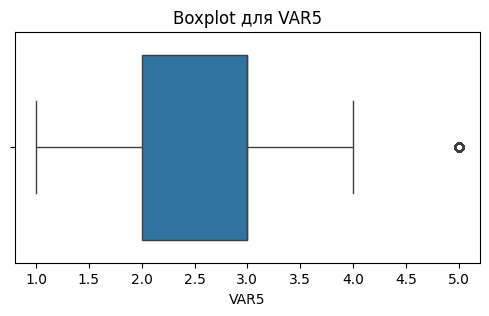

Выбросы в 'VAR5': 222 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,0,1,9.0,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
12,EID_4825,M,63.0,3,Married,Lebanon,Sales,Conceptual,27.0,1,29,0,2,7.0,type2,1.0,3,-0.1048,-0.4537,2.0,5,6,3,0.2109
17,EID_8049,F,40.0,4,Married,Springfield,Accounting and Finance,Directive,12.0,1,45,1,3,9.0,type3,2.0,3,-0.9612,-0.4537,2.0,5,8,4,0.1468
40,EID_17527,F,NaN,2,Married,Springfield,IT,Conceptual,4.0,1,72,2,5,6.0,type3,2.0,3,-1.8176,0.7075,2.0,5,6,2,0.0618
61,EID_14177,M,34.0,2,Married,Lebanon,Security,Conceptual,12.0,2,23,2,1,5.0,type4,1.0,3,NaN,-0.4537,2.0,5,5,3,0.0420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,EID_6109,F,54.0,3,Single,Washington,IT,Directive,16.0,2,23,1,3,6.0,type2,3.0,3,NaN,0.7075,2.0,5,8,3,0.0266
6868,EID_20876,M,35.0,4,Married,Lebanon,Security,Directive,9.0,4,61,2,2,9.0,type0,4.0,3,0.7516,-0.4537,2.0,5,8,3,0.1608
6904,EID_1163,M,57.0,5,Married,Franklin,Security,Analytical,34.0,1,54,1,3,10.0,type3,3.0,3,0.7516,1.8688,2.0,5,8,5,0.0843
6954,EID_23125,M,47.0,3,Single,Springfield,Logistics,Conceptual,16.0,3,26,2,3,3.0,type2,1.0,3,-0.9612,-0.4537,2.0,5,7,3,0.0295


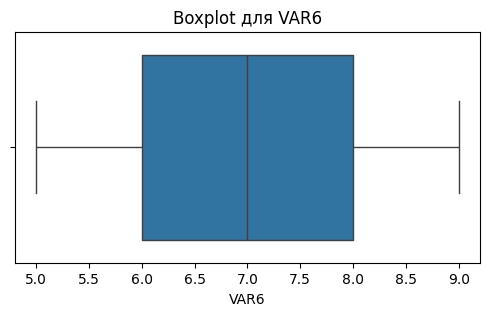

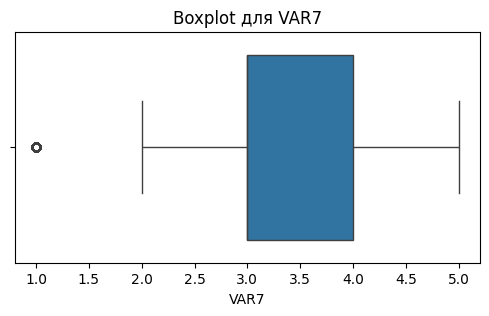

Выбросы в 'VAR7': 287 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
47,EID_10796,F,34.0,4,Married,Washington,IT,Directive,10.0,2,67,0,3,9.0,type2,2.0,3,0.7516,-0.4537,2.0,1,7,1,0.1519
180,EID_2190,F,58.0,3,Single,Lebanon,R&D,Analytical,32.0,2,66,1,1,6.0,type2,4.0,4,-0.9612,-0.4537,2.0,4,6,1,0.2394
187,EID_25009,F,35.0,3,Married,Washington,Production,Analytical,13.0,4,61,0,1,8.0,type3,2.0,3,-1.8176,0.7075,1.0,1,7,1,0.9391
193,EID_18349,F,21.0,3,Married,Clinton,Operarions,Directive,2.0,2,53,1,3,6.0,type0,4.0,3,-0.1048,-0.4537,3.0,3,6,1,0.0932
201,EID_22556,F,27.0,3,Married,Clinton,Production,Directive,3.0,1,62,0,2,4.0,type3,3.0,3,NaN,-0.4537,2.0,4,8,1,0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,EID_17038,M,27.0,5,Married,Springfield,IT,Analytical,5.0,1,29,0,2,9.0,type3,3.0,2,-1.8176,-0.4537,NaN,2,6,1,0.0020
6771,EID_22533,M,37.0,3,Single,Lebanon,R&D,Conceptual,11.0,1,59,0,3,5.0,type2,3.0,3,-0.1048,-0.4537,1.0,5,7,1,0.5289
6779,EID_8979,M,47.0,3,Single,Franklin,IT,Behavioral,14.0,3,33,0,3,5.0,type2,2.0,3,-1.8176,-0.4537,NaN,3,7,1,0.1797
6830,EID_24085,M,52.0,3,Single,Springfield,Purchasing,Conceptual,22.0,2,56,0,2,9.0,type2,1.0,4,0.7516,-0.4537,2.0,3,7,1,0.2485


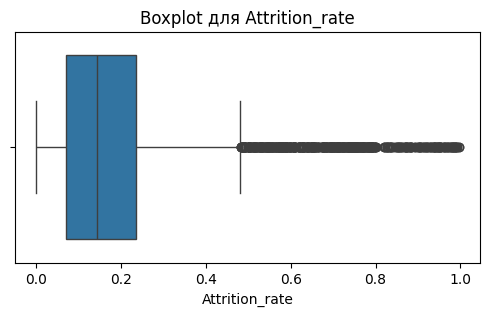

Выбросы в 'Attrition_rate': 602 строк


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
19,EID_12947,M,32.0,3,Single,Lebanon,IT,Conceptual,7.0,4,44,0,4,5.0,type2,1.0,3,NaN,0.7075,1.0,1,5,4,0.6410
25,EID_3901,F,NaN,2,Married,Washington,Marketing,Directive,15.0,1,58,1,3,3.0,type2,1.0,3,-0.1048,-0.4537,1.0,4,8,2,0.8727
27,EID_12981,M,28.0,3,Single,Lebanon,Sales,Conceptual,NaN,1,58,0,4,8.0,type2,1.0,3,0.7516,0.7075,2.0,3,8,3,0.6272
38,EID_11141,F,33.0,3,Married,Lebanon,Logistics,Analytical,9.0,3,72,0,1,10.0,type2,2.0,2,0.7516,-0.4537,NaN,2,7,3,0.6961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,EID_14849,F,28.0,4,Married,Springfield,Logistics,Conceptual,6.0,2,58,1,1,5.0,type2,2.0,3,NaN,-0.4537,2.0,3,9,3,0.6935
6966,EID_4159,F,65.0,1,Single,Washington,Marketing,Behavioral,34.0,4,40,1,3,4.0,type2,1.0,2,-0.9612,0.7075,2.0,3,6,5,0.8574
6985,EID_4484,M,65.0,3,Single,Washington,Human Resource Management,Conceptual,30.0,2,35,0,3,10.0,type2,1.0,5,0.7516,0.7075,2.0,2,8,3,0.5049
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839


In [88]:
for col in num_df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    if not outliers.empty:
        print(f"Выбросы в '{col}': {len(outliers)} строк")
        display(outliers)

In [ ]:
num_cols = list(num.columns)
grouped = df.groupby('Relationship_Status')[num_cols].agg(['mean', 'median', 'min', 'max'])
grouped.to_csv("/Users/dmitryo325/Desktop/yandex/relationship_status_stats.csv")

print(grouped)

                           Age                    Education_Level             \
                          mean median   min   max            mean median min   
Relationship_Status                                                            
Married              39.644486   37.0  19.0  65.0        3.188274    3.0   1   
Single               39.583298   38.0  19.0  65.0        3.187097    3.0   1   

                        Time_of_service                    \
                    max            mean median  min   max   
Relationship_Status                                         
Married               5       13.374605   10.0  0.0  43.0   
Single                5       13.404115   10.0  0.0  43.0   

                    Time_since_promotion                growth_rate         \
                                    mean median min max        mean median   
Relationship_Status                                                          
Married                         2.371460    2.0   0   4   4

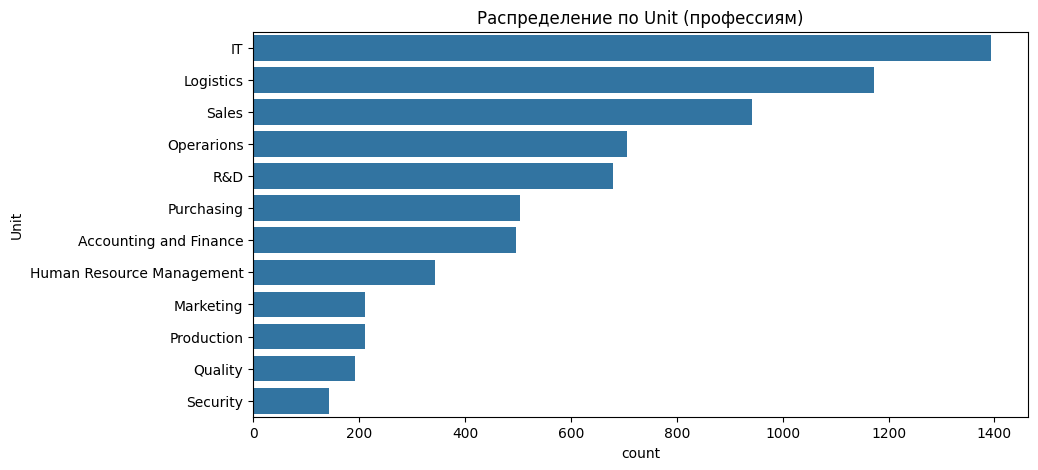

Самая популярная профессия: IT


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Unit", data=df, order=df["Unit"].value_counts().index)
plt.title("Распределение по Unit (профессиям)")
plt.show()

popular_unit = df["Unit"].mode()[0]
print("Самая популярная профессия:", popular_unit)

In [ ]:
mean_attrition = df["Attrition_rate"].mean()
sub = df[df["Unit"] == popular_unit]
married = sub[sub["Relationship_Status"].astype(str).str.lower().str.contains("mar")]
high_attr = married[married["Attrition_rate"] > mean_attrition]
print(f"Количество married в '{popular_unit}' с Attrition_rate выше среднего: {len(high_attr)}")

Количество married в 'IT' с Attrition_rate выше среднего: 293
